# Machine Learning II: Deep Learning and Applications
# Homework 1

**Due date: Feb 16**

### Instructions
- Make a copy of this notebook in your own Colab and complete the questions there.
- You can add more cells if necessary. You may also add descriptions to your code, though it is not mandatory.
- Make sure the notebook can run through by *Runtime -> Run all*. **Keep all cell outputs** for grading.
- Submit the link of your notebook [here](https://docs.google.com/forms/d/e/1FAIpQLSd3LoRVwJ1Nc8hogOv76Y6_JbfPTdRzxUNfaU1ZV9GVaIZDSA/viewform?usp=sf_link). Please **enable editing or comments** so that you can receive feedback from TAs.

Install PyTorch and Skorch.

In [2]:
!pip install -q torch skorch torchvision torchtext

     |████████████████████████████████| 112kB 54.1MB/s 


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import skorch
import sklearn
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [5]:
%cd /content/gdrive/My\ Drive/

/content/gdrive/My Drive


In [6]:
!pwd

/content/gdrive/My Drive


## 1. Tensor Operations (20 points)

Tensor operations are important in deep learning models. In this part, you are required to implement some common tensor operations in PyTorch.

### 1) Tensor squeezing, unsqueezing and viewing

Tensor squeezing, unsqueezing and viewing are important methods to change the dimension of a Tensor, and the corresponding functions are [torch.squeeze](https://pytorch.org/docs/stable/torch.html#torch.squeeze), [torch.unsqueeze](https://pytorch.org/docs/stable/torch.html#torch.unsqueeze) and [torch.Tensor.view](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view). Please read the documents of the functions, and finish the following practice.

In [0]:
# x is a tensor with size being (3, 2)
x = torch.Tensor([[1, 2], [3, 4], [5, 6]])
print("size of x:",x.size())

# Add two new dimensions to x by using the function torch.unsqueeze, so that the size of x becomes (3, 1, 2, 1).
x = torch.unsqueeze(torch.unsqueeze(x,1),-1)
print("size of x after addition of two dimensions :",x.shape)

# Remove the two dimensions justed added by using the function torch.squeeze, and change the size of x back to (3, 2).
x = torch.squeeze(torch.squeeze(x, -1), 1)
print("size of x after removing two dimensions",x.shape)

# x is now a two-dimensional tensor, or in other words a matrix. Now use the function torch.Tensor.view and change x to a one-dimensional vector with size being (6).
x=torch.Tensor.view(x,6)
print("modified tensor x:",x)
print("new size of x:",x.shape)

size of x: torch.Size([3, 2])
size of x after addition of two dimensions : torch.Size([3, 1, 2, 1])
size of x after removing two dimensions torch.Size([3, 2])
modified tensor x: tensor([1., 2., 3., 4., 5., 6.])
new size of x: torch.Size([6])


### 2) Tensor concatenation and stack

Tensor concatenation and stack are operations to combine small tensors into big tensors. The corresponding functions are [torch.cat](https://pytorch.org/docs/stable/torch.html#torch.cat) and [torch.stack](https://pytorch.org/docs/stable/torch.html#torch.stack). Please read the documents of the functions, and finish the following practice.

In [0]:
# x is a tensor with size being (3, 2)
x = torch.Tensor([[1, 2], [3, 4], [5, 6]])

# y is a tensor with size being (3, 2)
y = torch.Tensor([[-1, -2], [-3, -4], [-5, -6]])

# Our goal is to generate a tensor z with size as (2, 3, 2), and z[0,:,:] = x, z[1,:,:] = y.

# Use torch.stack to generate such a z
z = torch.stack([x, y,],dim=0)
print("concatenated tensor z shape:",z.shape)
print("concatenated tensor z:\n",z)

# Use torch.cat and torch.unsqueeze to generate such a z
z = torch.cat([torch.unsqueeze(x, 0),torch.unsqueeze(y, 0)], dim=0)
print("concatenated tensor z shape:",z.shape)

concatenated tensor z shape: torch.Size([2, 3, 2])
concatenated tensor z:
 tensor([[[ 1.,  2.],
         [ 3.,  4.],
         [ 5.,  6.]],

        [[-1., -2.],
         [-3., -4.],
         [-5., -6.]]])
concatenated tensor z shape: torch.Size([2, 3, 2])


### 3) Tensor expansion

Tensor expansion is to expand a tensor into a larger tensor along singleton dimensions. The corresponding functions are [torch.Tensor.expand](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand) and [torch.Tensor.expand_as](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand_as). Please read the documents of the functions, and finish the following practice. 

In [0]:
# x is a tensor with size being (3)
x = torch.Tensor([1, 2, 3])

# Our goal is to generate a tensor z with size (2, 3), so that z[0,:] = x, z[1,:] = x.

# [TO DO]
# Change the size of x into (1, 3) by using torch.unsqueeze.
x = torch.unsqueeze(x,dim=0)
print("changed size of x:",x.shape)

# [TO DO]
# Then expand the new tensor to the target tensor by using torch.Tensor.expand.
z = x.expand(2,-1)
print("expanded tensor z shape:",z.shape)
print("expanded tensor z:\n",z)

changed size of x: torch.Size([1, 3])
expanded tensor z shape: torch.Size([2, 3])
expanded tensor z:
 tensor([[1., 2., 3.],
        [1., 2., 3.]])


### 4) Tensor reduction in a given dimension

In deep learning, we often need to compute the mean/sum/max/min value in a given dimension of a tensor. Please read the document of [torch.mean](https://pytorch.org/docs/stable/torch.html#torch.mean), [torch.sum](https://pytorch.org/docs/stable/torch.html#torch.sum), [torch.max](https://pytorch.org/docs/stable/torch.html#torch.max), [torch.min](https://pytorch.org/docs/stable/torch.html#torch.min), [torch.topk](https://pytorch.org/docs/stable/torch.html#torch.topk), and finish the following practice.

In [0]:
# x is a random tensor with size being (10, 50)
x = torch.rand(10, 50)

# Compute the mean value for each row of x.
# You need to generate a tensor x_mean of size (10), and x_mean[k] is the mean value of the k-th row of x.
x_mean=torch.mean(x,dim=1)
print("mean value for each row of x:",x_mean.shape)

# Compute the sum value for each row of x.
# You need to generate a tensor x_sum of size (10).
x_sum = torch.sum(x,dim=1)
print("sum value for each row of x:",x_sum.shape)

# Compute the max value for each row of x.
# You need to generate a tensor x_max of size (10).
x_max = torch.max(x,dim=1).values
print("max value for each row of x:",x_max.shape)

# Compute the min value for each row of x.
# You need to generate a tensor x_min of size (10).
x_min = torch.min(x,dim=1).values
print("min value for each row of x:",x_min.shape)

# Compute the top-5 values for each row of x.
# You need to generate a tensor x_mean of size (10, 5), and x_top[k] is the top-5 values of each row in x.
x_top = torch.topk(x,5,dim=1).values
print("top-5 values for each row of x:",x_top.shape)

mean value for each row of x: torch.Size([10])
sum value for each row of x: torch.Size([10])
max value for each row of x: torch.Size([10])
min value for each row of x: torch.Size([10])
top-5 values for each row of x: torch.Size([10, 5])


## Convolutional Neural Networks (40 points)



Implement a convolutional neural network for image classification on CIFAR-10 dataset.

CIFAR-10 is an image dataset of 10 categories. Each image has a size of 32x32 pixels. The following code will download the dataset, and split it into `train` and `test`. For this question, we use the default validation split generated by Skorch.

In [44]:
train = torchvision.datasets.CIFAR10("./data", train=True, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(),]))
test = torchvision.datasets.CIFAR10("./data", train=False, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(),]))

Files already downloaded and verified
Files already downloaded and verified


The following code visualizes some samples in the dataset. You may use it to debug your model if necessary.

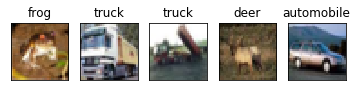

In [8]:
def plot(data, labels=None, num_sample=5):
  n = min(len(data), num_sample)
  for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(data[i], cmap="gray")
    plt.xticks([])
    plt.yticks([])
    if labels is not None:
      plt.title(labels[i])

train.labels = [train.classes[target] for target in train.targets]
plot(train.data, train.labels)

### 1) Basic CNN implementation


Consider a basic CNN model

- It has 3 convolutional layers, followed by a linear layer.
- Each convolutional layer has a kernel size of 3, a padding of 1.
- ReLU activation is applied on every hidden layer.

Please implement this model in the following section. You will need to tune the hyperparameters and fill the results in the table.

#### a) Implement convolutional layers

Implement the initialization function and the forward function of the CNN.

In [0]:
import torch
class CNN(nn.Module):
  def __init__(self, channels = 256):
    super(CNN, self).__init__()
    # implement parameter definitions here
    self.conv1 = nn.Conv2d(3, channels, kernel_size = 3, padding = 1,stride=1)
    self.conv2 = nn.Conv2d(channels, channels, kernel_size = 3, padding = 1, stride=1)
    self.conv3 = nn.Conv2d(channels, channels, kernel_size = 3, padding = 1, stride=1)
    self.fc1 = nn.Linear(channels * 32 * 32 , len(set(train.targets)))
  
  def forward(self, images):
    # implement the forward function here
    images = F.relu(self.conv1(images))
    images = F.relu(self.conv2(images))
    images = F.relu(self.conv3(images))
    images = images.view(-1, images.size(1) * images.size(2) * images.size(3))
    images = self.fc1(images)
    return images

In [0]:
len(set(train.targets))

10

#### b) Tune hyperparameters

Train the CNN model on CIFAR-10 dataset. Tune the number of channels, optimizer, learning rate and the number of epochs for best validation accuracy.

Write down **validation accuracy** of your model under different hyperparameter settings. Note the validation set is automatically split by Skorch during `model.fit()`.

**Hint:** You may need more epochs for SGD than Adam.

| #channel for each layer \ optimizer | SGD   | Adam  |
|-------------------------------------|-------|-------|
| (128, 128, 128)                     |0.3990 |0.6533 |
| (256, 256, 256)                     |0.4193 |0.6493 |
| (512, 512, 512)                     |0.4482 |0.6538 |


In [0]:
import pandas as pd

# Hyperparameters to search
lr = [1e-6,1e-5, 1e-4, 1e-3]
opt = [optim.SGD, optim.Adam]
ch = [128, 256, 512]

# Empty dataframe to store results
results = pd.DataFrame()

# Transform to the right type
X = torch.Tensor(train.data/255)
X = X.permute(0,3,1,2)

for l in lr:
  for o in opt:
    for c in ch:
      print("training for : {0} channels, {1} learning rate, {2} optimizer".format(c, l, str(o)) )
      
      # Define number of channels
      cnn = CNN(channels = c)
      
      # implement hyperparameters here
      model = skorch.NeuralNetClassifier(cnn, criterion=torch.nn.CrossEntropyLoss,
                                        device="cuda",
                                        max_epochs = 50, batch_size=64,
                                        optimizer=o,
                                        lr = l,
                                        callbacks = [skorch.callbacks.EarlyStopping(lower_is_better=True)])
      
      # implement input normalization & type cast here
      model.fit(X, np.array(train.targets))

      # Store results for this hyperparameters
      result = pd.DataFrame(pd.DataFrame(model.history).sort_values('valid_loss').loc[0, ["epoch", "train_loss", "valid_loss", "valid_acc"]]).T
      result.assign(learning_rate = str(l), inplace = True)
      result.assign(channels = str(c), inplace = True)
      result.assign(optimizer = str(o), inplace = True)
      
      # concat to results table
      results = pd.concat([results, result])
results.to_csv("CNN_1b_results.csv")

training for : 128 channels, 0.0001 learning rate, <class 'torch.optim.sgd.SGD'> optimizer
  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1        2.3001       0.1008        2.2972  15.4241
      2        2.2946       0.1043        2.2914  15.3893
      3        2.2882       0.1146        2.2841  15.0981
      4        2.2800       0.1388        2.2745  15.0585
      5        2.2690       0.1713        2.2615  15.0326
      6        2.2539       0.1976        2.2435  15.1531
      7        2.2334       0.2168        2.2196  15.2558
      8        2.2068       0.2276        2.1896  15.2023
      9        2.1749       0.2395        2.1555  15.1070
     10        2.1405       0.2520        2.1206  15.0899
     11        2.1068       0.2658        2.0877  15.1055
     12        2.0752       0.2796        2.0570  15.2047
     13        2.0453       0.2915        2.0277  15.1804
     14        2.0169       0.3010     

### 2) Full CNN implementation

Based on the CNN in the previous question, implement a full CNN model with max pooling layer.

- Add a max pooling layer after each convolutional layer.
- Each max pooling layer has a kernel size of 2 and a stride of 2.

Please implement this model in the following section. You will need to tune the hyperparameters and fill the results in the table. You are also required to complete the questions.

#### a) Implement max pooling layers

Copy the CNN implementation in previous question. Implement max pooling layers.

In [0]:
class CNN_MaxPool(nn.Module):
  
  def __init__(self,channels_1=512,channels_2=1024,channels_3=2048):
    super(CNN_MaxPool, self).__init__()
    # implement parameter definitions here
    self.conv1 = nn.Conv2d(3, channels_1, kernel_size = 3, padding = 1,stride=1)
    self.conv2 = nn.Conv2d(channels_1, channels_2, kernel_size = 3, padding = 1,stride=1)
    self.conv3 = nn.Conv2d(channels_2, channels_3, kernel_size = 3, padding = 1,stride=1)
    self.fc1 = nn.Linear(channels_3 * 4 * 4 , len(set(train.targets)))
  
  def forward(self, images):
    # implement the forward function here
    
    images = F.relu(F.max_pool2d(self.conv1(images), stride = 2, kernel_size=2))
    images = F.relu(F.max_pool2d(self.conv2(images), stride = 2, kernel_size=2))
    images = F.relu(F.max_pool2d(self.conv3(images), stride = 2, kernel_size=2))
    images = images.view(-1, images.size(1) * images.size(2) * images.size(3))
    images = self.fc1(images)
    return images


#### b) Tune hyperparameters

Based on best optimizer you found in the previous problem, tune the number of channels and learning rate for best validation accuracy.

In [28]:
import pandas as pd

# Hyperparameters to search
lr=[1e-6,1e-5,1e-4,1e-3]
opt = [optim.Adam]
ch = [[128, 128, 128], [128, 256, 512], [256, 256, 256], [256, 512, 1024], [512, 512, 512], [512, 1024, 2048],]

# Empty dataframe to store results
results = pd.DataFrame()

# Transform to the right type
X = torch.FloatTensor(train.data.reshape(-1, 3, 32, 32) / 255.0)


for l in lr:
  for o in opt:
    for c in ch:
      print("training for : {0} channels | {1} learning rate | {2} optimizer".format(str(c), l, str(o)) )
      
      # Define number of channels
      cnn = CNN_MaxPool(channels_1=c[0],channels_2=c[1],channels_3=c[2])
      
      # implement hyperparameters here
      model = skorch.NeuralNetClassifier(cnn, criterion=torch.nn.CrossEntropyLoss,
                                        device="cuda",
                                        max_epochs = 20,
                                        optimizer = o,
                                        lr = l,
                                        callbacks = [skorch.callbacks.EarlyStopping(lower_is_better=True)])
      
      # implement input normalization & type cast here
      model.fit(X, np.array(train.targets))

      # Store results for this hyperparameters
      result = pd.DataFrame(pd.DataFrame(model.history).sort_values('valid_loss').loc[0, ["epoch", "train_loss", "valid_loss", "valid_acc"]]).T
      result.assign(learning_rate = str(l), inplace = True)
      result.assign(optimizer = str(o), inplace = True)
      result.assign(channels_3 = str(c), inplace = True)
      
      # concat to results table
      results = pd.concat([results, result])
results.to_csv("CNN_q2b_results.csv")



training for : [128, 128, 128] channels | 0.0001 learning rate | <class 'torch.optim.adam.Adam'> optimizer
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        2.0693       0.3174        1.9151  6.3785
      2        1.8444       0.3614        1.7865  6.3543
      3        1.7563       0.3836        1.7245  6.3718
      4        1.7048       0.3965        1.6834  6.3179
      5        1.6689       0.4075        1.6533  6.3395
      6        1.6408       0.4143        1.6297  6.3382
      7        1.6167       0.4213        1.6089  6.3642
      8        1.5956       0.4311        1.5904  6.3651
      9        1.5766       0.4388        1.5740  6.3764
     10        1.5590       0.4443        1.5591  6.3363
     11        1.5428       0.4487        1.5450  6.3105
     12        1.5275       0.4509        1.5326  6.3131
     13        1.5129       0.4562        1.5209  6.4280
     14        1.4991       0.4627    

Write down the **validation accuracy** of your model under different hyperparameter settings.

| #channel for each layer | validation accuracy |
|-------------------------|---------------------|
| (128, 128, 128)         |   0.4819            |
| (128, 256, 512)         |   0.5260            |
| (256, 256, 256)         |   0.5285            |
| (256, 512, 1024)        |   0.5506            |
| (512, 512, 512)         |   0.5415            |
| (512, 1024, 2048)       |   0.5454            |


For the best model you have, test it on the test set.

It is fine if you found some hyperparameter combination better than those listed in the tables.

In [35]:
# implement the same input normalization & type cast here
test.predictions = model.predict(torch.Tensor(test.data.reshape(-1,3,32,32)/255.0))
sklearn.metrics.accuracy_score(test.targets, test.predictions)

0.5231

How much **test accuracy** do you get?

**Your Answer:** 0.5213

What can you conclude for the design of CNN structure?

**Your Answer:** Increase in number of layers results in extracting more features until the model starts to overfit the data. Therefore, with the accurate variation of hyperparameters, the CNN structure will be able to achieve an optimum validation accuracy and test accuracy. In the above model, we find learning rate = 1e-4 or 0.0001, channels for each layer = (512,1024,2048) respectively, optimizer = Adam, epoch = 20, we achieve a validation accuracy = 0.5454 and test accuracy = 0.5213

## Recurrent Neural Networks (40 points)

Next, let's use PyTorch to implement a recurrent neural network for sentiment analysis, i.e., classifying sentences into given sentiment labels, including positive, negative and neutral.

We use a benckmark dataset (i.e., SST) for this task. First, let's download the SST dataset, and do some preprocessing to build vocabulary and split the dataset into training/validation/test sets. Also, let's define the training and evaluation function. Please do not modify the functions.

In [0]:
import copy
import torch
from torch import nn
from torch import optim
import torchtext
from torchtext import data
from torchtext import datasets

TEXT = data.Field(sequential=True, batch_first=True, lower=True)
LABEL = data.LabelField()

# load data splits
train_data, val_data, test_data = datasets.SST.splits(TEXT, LABEL)

# build dictionary
TEXT.build_vocab(train_data)
LABEL.build_vocab(train_data)

vocab_size = len(TEXT.vocab)
label_size = len(LABEL.vocab)
padding_idx = TEXT.vocab.stoi['<pad>']
embedding_dim = 64
hidden_dim = 256

# build iterators
train_iter, val_iter, test_iter = data.BucketIterator.splits(
    (train_data, val_data, test_data), 
    batch_size=64)

# train a model
# DO NOT MODIFY
def train(model, iterator, optimizer, criterion):
    total_loss, total_correct, total_prediction = 0.0, 0.0, 0.0
    model.train()
    for batch in iterator:
        optimizer.zero_grad()
        logits = model(batch.text.cuda())
        predictions = torch.max(logits, dim=-1)[1]
        loss = criterion(logits, batch.label.cuda())
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        total_correct += torch.eq(predictions, batch.label.cuda()).sum().item()
        total_prediction += batch.label.size(0)
    return total_loss / len(iterator), total_correct / total_prediction

# evaluate a model
# DO NOT MODIFY
def evaluate(model, iterator, criterion):  
    total_loss, total_correct, total_prediction = 0.0, 0.0, 0.0
    model.eval()
    with torch.no_grad():
        for batch in iterator:
            logits = model(batch.text.cuda())
            predictions = torch.max(logits, dim=-1)[1]
            loss = criterion(logits, batch.label.cuda())

            total_loss += loss.item()
            total_correct += torch.eq(predictions, batch.label.cuda()).sum().item()
            total_prediction += batch.label.size(0)
    return total_loss / len(iterator), total_correct / total_prediction

Next, we are ready to build our RNN model for sentiment analysis. In the following codes, we have provided several hyperparameters we needed for building the model, including vocabulary size (vocab_size), the word embedding dimension (embedding_dim), the hidden layer dimension (hidden_dim), the number of layers (num_layers) and the number of sentence labels (label_size). Please fill in the missing codes, and implement an LSTM model.

In [0]:
class RNNClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, label_size, padding_idx):
        super(RNNClassifier, self).__init__()
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.label_size = label_size
        self.num_layers = 1


        # add the layers required for sentiment analysis.
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=padding_idx)
        self.lstm=nn.LSTM(input_size=embedding_dim,hidden_size=hidden_dim,num_layers=self.num_layers)
        self.fc=nn.Linear(hidden_dim,label_size)

    def zero_state(self, batch_size): 
        # implement the function, which returns an initial hidden state.
          h=torch.zeros(self.num_layers,batch_size,self.hidden_dim)
          c=torch.zeros(self.num_layers,batch_size,self.hidden_dim)
          return h, c

    def forward(self, text):
        # implement the forward function of the model.
        h,c=self.zero_state(text.size(0))
        embedding=self.embedding(text)
        lstm_out, _=self.lstm(embedding)
        lstm_out = F.softmax(lstm_out, dim=-1)
        return self.fc(lstm_out[:, 1, :])

Finally, we are ready to train the model and compute the accuracy.

In [42]:
model = RNNClassifier(vocab_size, embedding_dim, hidden_dim, label_size, padding_idx)
# tune the optimizer type and hyperparameters here
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
model.cuda()
criterion.cuda()

# train and test the model
# DO NOT MODIFY
best_valid_acc = 0.0
best_state_dict = copy.deepcopy(model.state_dict())
for epoch in range(50):
    train_loss, train_acc = train(model, train_iter, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, val_iter, criterion)

    print('Epoch {} | Train loss {:.3f} | Train Accuracy {:.3f} | Valid loss {:.3f} | Valid acc {:.3f}'.format(epoch, train_loss, train_acc, valid_loss, valid_acc))

    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        best_state_dict = copy.deepcopy(model.state_dict())

Epoch 0 | Train loss 1.050 | Train Accuracy 0.416 | Valid loss 1.063 | Valid acc 0.403
Epoch 1 | Train loss 1.048 | Train Accuracy 0.422 | Valid loss 1.060 | Valid acc 0.403
Epoch 2 | Train loss 1.048 | Train Accuracy 0.418 | Valid loss 1.062 | Valid acc 0.403
Epoch 3 | Train loss 1.047 | Train Accuracy 0.423 | Valid loss 1.061 | Valid acc 0.403
Epoch 4 | Train loss 1.040 | Train Accuracy 0.457 | Valid loss 1.059 | Valid acc 0.406
Epoch 5 | Train loss 1.005 | Train Accuracy 0.549 | Valid loss 1.065 | Valid acc 0.421
Epoch 6 | Train loss 0.949 | Train Accuracy 0.584 | Valid loss 1.085 | Valid acc 0.420
Epoch 7 | Train loss 0.920 | Train Accuracy 0.590 | Valid loss 1.088 | Valid acc 0.431
Epoch 8 | Train loss 0.898 | Train Accuracy 0.590 | Valid loss 1.081 | Valid acc 0.425
Epoch 9 | Train loss 0.880 | Train Accuracy 0.589 | Valid loss 1.090 | Valid acc 0.426
Epoch 10 | Train loss 0.864 | Train Accuracy 0.589 | Valid loss 1.094 | Valid acc 0.410
Epoch 11 | Train loss 0.853 | Train Accura

Once we find the best hyperparameters for the validation set, we can now evaluate our model on the test set.

In [0]:
model.load_state_dict(best_state_dict)
test_loss, test_acc = evaluate(model, test_iter, criterion)
print('Test loss {:.3f} | Test acc {:.3f}'.format(test_loss, test_acc))

Test loss 1.040 | Test acc 0.476


### 1) Implement the RNN model

The current codes of the RNN model are not complete, so let's first complete the codes to implement a standard RNN model by filling in the [block](https://colab.research.google.com/drive/1mhhF9FPHSmePtVQrhNBwRujfUkOjUspj#scrollTo=kWUKPgDGNQSr).

- **Subtask 1-1: Creating all the Required Layers in Your Model**

Remember that when building a deep learning model, we first need to complete the **init** function by creating all the required layers. In our case, since we are using RNNs for sentence classification, we need an embedding layer to transform words into word embeddings, a RNN layer to transform word embeddings into sentence encodings, an activation function, and a linear layer as well as a softmax function for sentence classification.

Based on that, please create all the necessary layers of your RNN model in the **init** function. Note that we have already added the word embedding layer for you.

- **Subtask 1-2: Implementing the Function for Initializing Hidden States**

Remember that when applying a RNN unit to transform word embeddings into sentence encodings, the RNN unit starts from an initial hidden vector with all zero values, and sequentially read each word to update the hidden vector. Finally, the hidden vector obtained after reading the last word is treated as the sentence encoding.

In this step, please implement the **zero_state** function, which returns a batch of initial hidden vectors given a batch size. Hint: your function should return a tensor with all the values being zero, and you may refer to the [official document](https://pytorch.org/docs/stable/nn.html#rnn) for the correct shape of the tensor.

- **Subtask 1-3: Implementing the Forward Function**

Finally, we are ready to build the forward function, which takes a batch of sentences as inputs and returns the a batch of logits. To be more specific, the input is given by the tensor called $\text{text}$, and the size of the tensor is $(B, L)$, with $B$ being the batch size, $L$ being the maximum length of sentencees in this batch and $\text{text}[i, j]$ being the interger id of the $j$-th word in the $i$-th sentence. Given this tensor as input, your forward function should return a logit tensor of size $(B, C)$, with $B$ being the batch size and $C$ being the number of possible classes.

Please implement the forward function based on the above instructions. Note that we have already applied the word embedding layer to the text input, and obtained a tensor called $\text{embedding}$, and the size of the tensor is $(B, L, D)$, where $D$ is the word embedding dimension. You can directly operate on the $\text{embedding}$ tensor to compute the logits.

### 2) Compare Different Optimizers

In the previous task, we have implemented a RNN model for sentiment analysis, or more generally sentence classification.

To better understand several concepts in deep learning, let's do some ablation studies by using the model we have just implemented.

The first task is to try different optimizers for your model, where for each optimizer, you may also try different options of learning rate. 


- **Subtask 2-1: Completing the Table**

We have provided the following table for different combinations of optimizers and learning rate, please write down the **validation accuracy** of your model with different optimizers and learning rates.

|         | 0.1  | 0.01 | 0.001|0.0001|
|---------|------|------|------|------|
| SGD     | 0.403|0.403 |0.403 |0.403 |
| Adam    | 0.444|0.449 |0.445 |0.403 |
| RMSprop | 0.419|0.441 |0.441 |0.403 |

- **Subtask 2-2: Explaining your Observations**

Based on your results, briefly explain your observations, e.g., which optimizer works the best, what is the optimal learning rate for each optimizer?

*Your Answer:*
Based on the observations, learning rate of 0.01 is optimal for the above deep learning model. Given the learning rate, SGD optimizer gives a validation accuracy of 0.403, Adam yields a validation accuracy of 0.449 and RMSprop of 0.441. Although the training accuracy yield of Adam and RMSprop are comparable, it is known that Adam is much faster and therefore is the best optimizer for the above model.

### 3) Compare the Results under Different Epoches

In this task, we hope to compare the results of our model under different training epoches, and answer a question.

- **Subtask 3-1: Completing the Table**

We have provided the following table, please write down the **training accuracy** and **validation accuracy** of your model under different epoches.

|                    |  10  |  20  |  30  |  40  |  50  |
|--------------------|------|------|------|------|------|
| Training Accuracy  |0.596 |0.637 |0.641 |0.641 |0.644 |
| Validation Accuracy|0.441 |0.451 |0.445 |0.445 |0.447 |


- **Subtask 3-2: Answering the Question**

Is it always better to train a model for more epoches? How can we decide when should we stop training?

*Your Answer:* As long as the validation loss and training loss keeps dropping, running the model for more epochs is better. Once the validation error starts increasing, it is an indication of overfitting the data and we should stop training. 

### 4) Compare Different Model Capacities/Configurations

In practice, we may also vary the capacity of our model to find the optimal choice. In this part, please try different configurations of your model, which have different model capacities. Based on your observation, please also answer a question.

- **Subtask 4-1: Completing the Table**

Please write down the **validation accuracy** of your model under different model capacities (i.e., specified by the word embedding dimension and the hidden layer dimension).

|Embedding dim / Hidden dim |  64  |  128  |  256 |
|---------------------------|------|-------|------|
| 64                        |0.447 |0.450  |0.451 |
| 128                       |0.440 |0.449  |0.437 |
| 256                       |0.430 |0.431  |0.441 |

- **Subtask 4-2: Answering the Question**

Is it always better to increase model capacities in this case? Is it always better to increase model capacities in general? How to decide a proper model capacity in practice?

*Your Answer:* In the above model, validation accuracy decreases with increase in embedding dimension keeping the hidden dimension fixed and increases with increase in hidden dimension keeping the embedding dimension fixed. Therefore, (embedding dim, hidden dim)=(64,256) yields the best validation accuracy for the above deep learning model. In general, increasing dimensionality could mean increasing sparsity resulting in allowing data points to differ and increase validation error. However, it is not applicable to all cases in general. A good model is one which is able to generalize well. In practice, we can decide a proper model capacity by starting with default values and then increasing to realize a pattern until we determine the best capacity for the model.
